In [1]:
%matplotlib inline

### Color, Line Style and Marker Demo

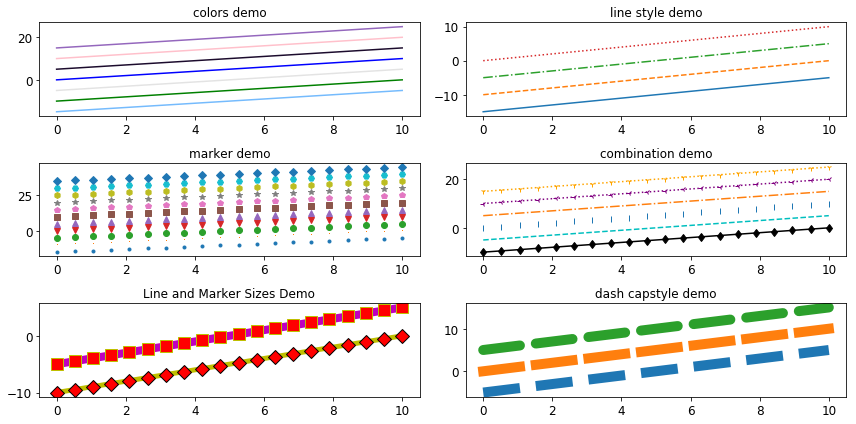

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Define The figure layout
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)

# Set up data for x co-ordinates, 20 numbers equally spaced between 0 and 10
x = np.linspace(0, 10, 20)

# Demonstration of many ways of color specification
# 'xkcd:sky blue'      # name from xkcd color survey
# 'green'              # CSS4 color name
# '#1F1F1F1F'          # hexadecimal value in RGBA format
# 'b'                  # CSS4 color abbreviation
# '#1C0B2D'            # hexadecimal value in RGB format, digits range from 0 to F
# 'pink'               # tableau color
# 'C4'                 # color from property cycle, this is case sensitive, C has to be capital

color_list = ['xkcd:sky blue', 'green', '#1F1F1F1F', 'b', '#1C0B2D', 'pink', 'C4']
for i, color in enumerate(color_list):
    y = x - (-5*i + 15)
    ax1.plot(x, y, color)
ax1.set_title('colors demo')

# Demonstration of many line styles
line_style = ['-', '--', '-.', ':']
for i, ls in enumerate(line_style):
    y = x - (-5*i + 15)
    ax2.plot(x, y, ls)
ax2.set_title('line style demo')

# Demonstration of many marker specifications
marker_list = ['.', ',', 'o', 'v', '^', 's', 'p', '*', 'h', 'H', 'D']
for i, marker in enumerate(marker_list):
    y = x - (-5*i + 15)
    ax3.plot(x, y, marker)
ax3.set_title('marker demo')

# Demonstration of specifying combination of color, line style and marker
y = x
ax4.plot(x, y-10, 'k-d')
ax4.plot(x, y-5, 'c--')
ax4.plot(x, y, '|')
ax4.plot(x, y+5, '-.')
ax4.plot(x, y+10, color='purple', ls=':', marker='3')
ax4.plot(x, y+15, color='orange', linestyle=':', marker='1')
ax4.set_title('combination demo')

# Demonstration of specifying colors and sizes of line and marker
ax5.plot(x, y-10, 'y-D', linewidth=5, markersize=10, markerfacecolor='red', markeredgecolor='k',markeredgewidth=1)
ax5.plot(x, y-5, 'm-s', lw=8, ms=12, markerfacecolor='red', markeredgecolor='y', markeredgewidth=1)
ax5.set_title('Line and Marker Sizes Demo')

dash_capstyles = ['butt','projecting','round']
for i, cs in enumerate(dash_capstyles):
    y = x - (-5*i + 5)
    ax6.plot(x, y, ls='--', lw=10, dash_capstyle=cs)
ax6.set_title('dash capstyle demo')

plt.tight_layout()
plt.show()

### Color map demo

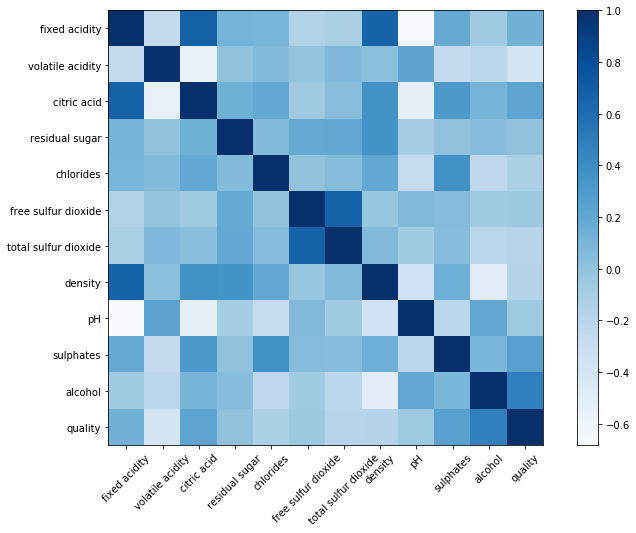

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

wine_quality = pd.read_csv('winequality.csv', delimiter=';')
corr = wine_quality.corr()

plt.figure(figsize=(12,8))
plt.imshow(corr, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation=45)
plt.yticks(range(len(corr)),corr.columns)

plt.show()

### Limiting color range and Adjusting color bar range

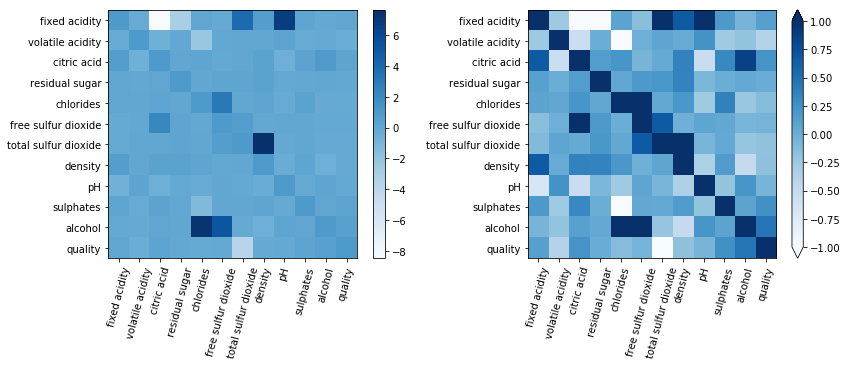

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.random.seed(1968)

wine_quality = pd.read_csv('winequality.csv', delimiter=';')
corr = wine_quality.corr()

# make noise in 10% of the image pixels
mask = (np.random.random(corr.shape) < 0.1)
corr1 = np.array(corr)
columns = corr.columns
corr1[mask] = np.random.normal(0, 5, np.count_nonzero(mask))
corr = pd.DataFrame(corr1, columns=columns)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(corr, cmap='Blues')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns, rotation=75)
plt.yticks(range(len(corr)),corr.columns)

plt.subplot(122)
plt.imshow(corr, cmap='Blues')
plt.colorbar(extend='both')
plt.clim(-1, 1)
plt.xticks(range(len(corr)),corr.columns, rotation=75)
plt.yticks(range(len(corr)),corr.columns)

plt.tight_layout()
plt.show()

### Costomised colorbar with discrete colors

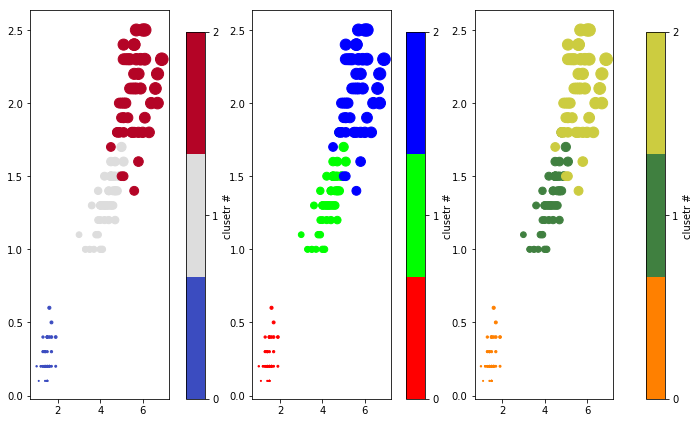

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

iris = pd.read_csv('iris_dataset.csv', delimiter=',')
iris['species'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})

fig, axs = plt.subplots(1,3, figsize=(9,6))
fig.subplots_adjust(left=0.0, bottom=0.05, right=0.9, top=0.95, wspace=0.6)

def plot_graph(axes, cm, cbaxs):
    im = axes.scatter(iris.petal_length, iris.petal_width, s=10*iris.petal_length*iris.petal_width,
            c=iris.species, cmap = cm)
    caxs = plt.axes(cbaxs)    
    fig.colorbar(im, caxs, ticks=range(3), label='clusetr #')

cbaxs = [0.24, 0.05, 0.03, 0.85]      # left, bottom, width and height
plot_graph(axs[0], plt.cm.get_cmap('coolwarm', 3), cbaxs)

colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
cm = LinearSegmentedColormap.from_list('custom_RGB_cmap', colors, N=3)
cbaxs = [0.58, 0.05, 0.03, 0.85]
plot_graph(axs[1], cm, cbaxs)

colors = [(1, 0.5, 0), (0.25, 0.5, 0.25), (0.8, 0.8, 0.25)]  # R -> G -> B
cm = LinearSegmentedColormap.from_list('dummy', colors, N=3)
cbaxs = [0.95, 0.05, 0.03, 0.85]
plot_graph(axs[2], cm, cbaxs)

plt.show()

### Customised colorbar with continuous color range

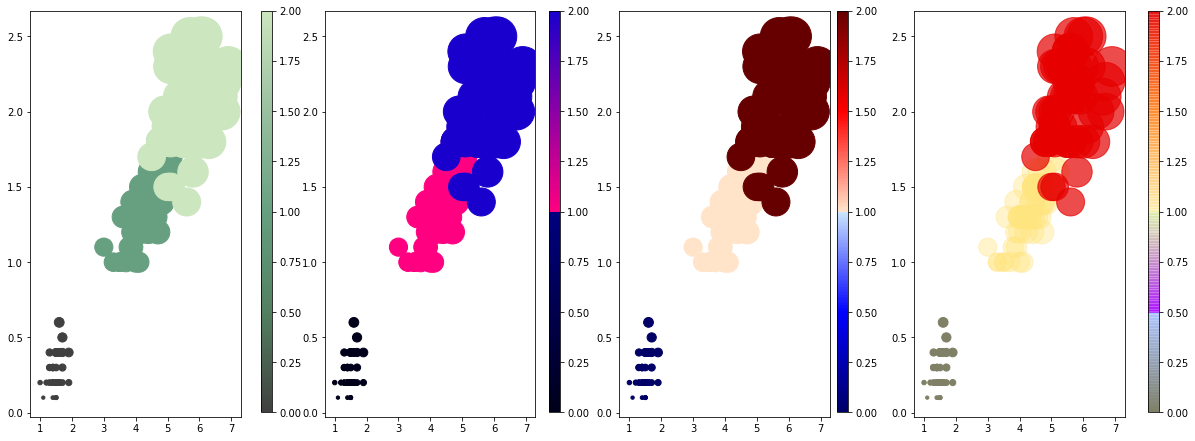

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

cdict1 = {'red':   ((0.0, 0.0, 0.25), (0.5, 0.4, 0.4), (1.0, 0.8, 1.0)),
          'green': ((0.0, 0.0, 0.25), (0.25, 0.5, 0.5), (0.75, 0.75, 0.75), (1.0, 0.9, 1.0)),
          'blue':  ((0.0, 0.0, 0.25), (0.5, 0.5, 0.5), (1.0, 0.75, 1.0))}
cdict2 = {'red' : ((0.0, 0.0, 0.0), (0.5, 0.0, 1.0), (1.0, 0.1, 1.0)),
          'green': ((0.0, 0.0, 0.0), (1.0, 0.0, 0.0)), 
          'blue': ((0.0, 0.0, 0.1), (0.5, 0.5, 0.5), (1.0, 0.8, 0.8)) }
cdict3 = {'red': ((0.0, 0.0, 0.0), (0.25, 0.0, 0.0), (0.5, 0.8, 1.0), (0.75, 1.0, 1.0),(1.0, 0.4, 1.0)),
          'green': ((0.0, 0.0, 0.0), (0.25, 0.0, 0.0), (0.5, 0.9, 0.9),(0.75, 0.0, 0.0), (1.0, 0.0, 0.0)),
          'blue': ((0.0, 0.0, 0.4), (0.25, 1.0, 1.0), (0.5, 1.0, 0.8), (0.75, 0.0, 0.0), (1.0, 0.0, 0.0))} 
cdict4 = {'red': ((0.0, 0.0, 0.5), (0.5, 0.8, 1.0), (0.75, 1.0, 1.0), (1.0, 0.9, 1.0)),
          'green': ((0.0, 0.0, 0.5), (0.25, 0.75, 0.0), (0.5, 0.9, 0.9), (1.0, 0.0, 0.0)),
         'blue': ((0.0, 0.0, 0.4), (0.25, 1.0, 1.0), (0.75, 0.0, 0.0), (1.0, 0.0, 0.0)),
          'alpha': ((0.0, 1.0, 1.0), (0.5, 0.4, 0.4), (1.0, 0.7, 1.0)) }

iris = pd.read_csv('iris_dataset.csv', delimiter=',')
iris['species'] = iris['species'].map({"setosa" : 0, "versicolor" : 1, "virginica" : 2})

fig, axs = plt.subplots(1,4, figsize=(16,6))
fig.subplots_adjust(left=0.0, bottom=0.0, right=0.95, top=0.94, wspace=0.4)

def plot_graph(name, dictionary, axs, cbaxs):
    custom = LinearSegmentedColormap(name, dictionary)
    im = axs.scatter(iris.petal_length, iris.petal_width, s=100*iris.petal_length*iris.petal_width,
            c=iris.species, cmap=custom)
    caxs = plt.axes(cbaxs)    # left, bottom, width and height
    fig.colorbar(im, caxs)

plot_graph('custom1', cdict1, axs[0], [0.2, 0.01, 0.01, 0.93])
plot_graph('custom2', cdict2, axs[1], [0.45, 0.01, 0.01, 0.93])
plot_graph('custom3', cdict3, axs[2], [0.7, 0.01, 0.01, 0.93])
plot_graph('custom4', cdict4, axs[3], [0.97, 0.01, 0.01, 0.93])

plt.show()

### Legend 

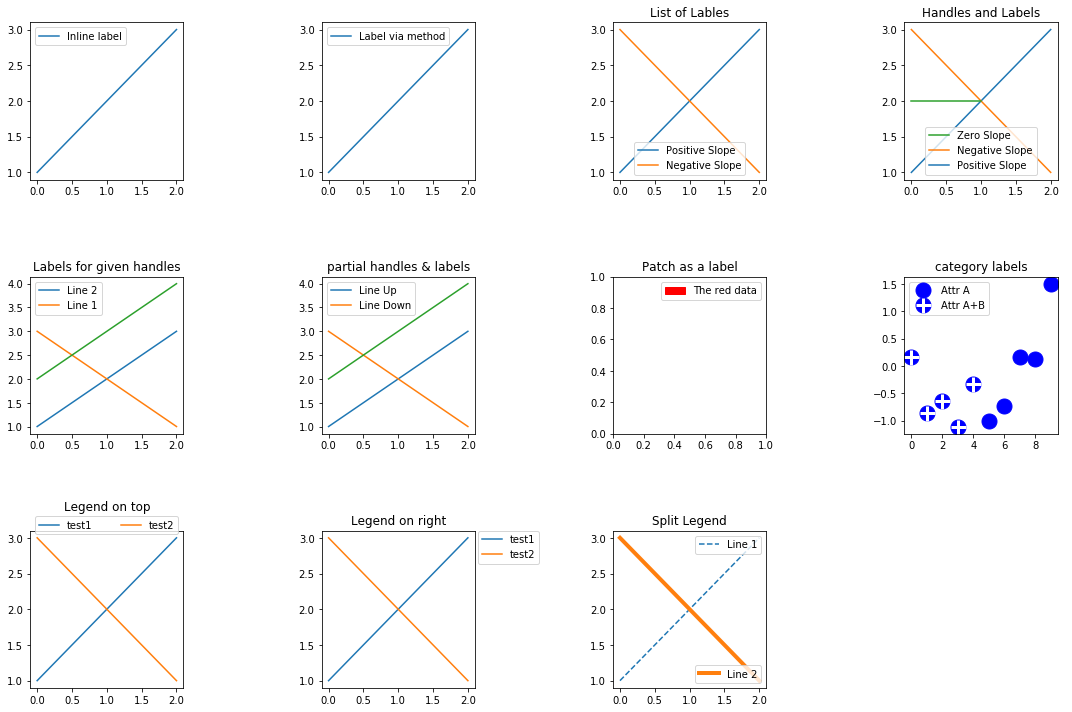

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from numpy.random import randn

plt.figure(figsize=(15, 10))
plt.subplot(3,4,1)
line, = plt.plot([1, 2, 3], label='Inline label')
plt.legend()

plt.subplot(3,4,2)
line, = plt.plot([1, 2, 3])
line.set_label('Label via method')
plt.legend()

plt.subplot(3,4,3)
plt.plot([1, 2, 3])
plt.plot([3, 2, 1])
plt.legend(['Positive Slope', 'Negative Slope'])
plt.title('List of Lables')

plt.subplot(3,4,4)
line1, = plt.plot([1, 2, 3])
line2, = plt.plot([3, 2, 1])
line3, = plt.plot([2,2])
plt.legend((line3, line2, line1), ('Zero Slope', 'Negative Slope', 'Positive Slope'))
plt.title('Handles and Labels')

plt.subplot(3,4,5)
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
line_3, = plt.plot([2,3,4], label='no label')
plt.legend(handles=[line_up, line_down])
plt.title('Labels for given handles')

plt.subplot(3,4,6)
line_up, = plt.plot([1,2,3], label='Line 2')
line_down, = plt.plot([3,2,1], label='Line 1')
line_3, = plt.plot([2,3,4], label='no label')
plt.legend([line_up, line_down], ['Line Up', 'Line Down'])
plt.title('partial handles & labels')

plt.subplot(3,4,7)
red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])
plt.title('Patch as a label')

plt.subplot(3,4,8)
z = randn(10)
blue_dot, = plt.plot(z, "bo", markersize=15)
# Put a white cross over some of the data.
white_cross, = plt.plot(z[:5], "w+", markeredgewidth=3, markersize=15)
plt.legend([blue_dot, (blue_dot, white_cross)], ["Attr A", "Attr A+B"])
plt.title('category labels')

plt.subplot(3,4,9)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")
# Place a legend above this subplot, expanding itself to
# fully use the given bounding box.
plt.legend(bbox_to_anchor=(0, 1.02, 1., .102),            #left, bottom, width, height
           ncol=2, mode="expand", borderaxespad=0.5)
ax = plt.gca()
ax.set_title('Legend on top', pad=20)

plt.subplot(3,4,10)
plt.plot([1, 2, 3], label="test1")
plt.plot([3, 2, 1], label="test2")
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.02, 1.0), borderaxespad=0)
plt.title('Legend on right')

plt.subplot(3,4,11)
line1, = plt.plot([1, 2, 3], label="Line 1", linestyle='--')
line2, = plt.plot([3, 2, 1], label="Line 2", linewidth=4)
# Create a legend for the first line.
first_legend = plt.legend(handles=[line1], loc=1)
# Add the legend manually to the current Axes. Repeated calls to plt.legend() will overwrite previous calls, so only last one remains
ax = plt.gca().add_artist(first_legend)
# Create another legend for the second line.
plt.legend(handles=[line2], loc=4)
plt.title('Split Legend')

plt.subplot(3,4,12)
plt.axis('off')

plt.tight_layout(w_pad=5, h_pad=5)

plt.show()

### Customising Labels and Titles

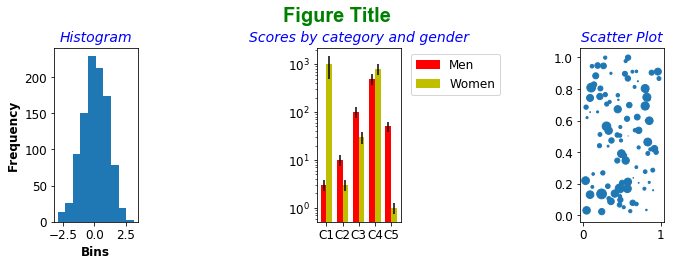

In [40]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1968)

plt.rcParams['figure.titlesize'] = 15
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

fig, ax = plt.subplots(1, 3, figsize=(10,4))

ax[0].hist(np.random.randn(1000))
ax[0].set(xlabel='Bins', ylabel='Frequency')
atitle = ax[0].set_title('Histogram', fontstyle='italic', fontsize=14)
plt.setp(atitle,color='blue')

menMue = [3, 10, 100, 500, 50]
menSigma = [0.75, 2.5, 25, 125, 12.5]
index = np.arange(len(menMue))                # the x locations for the groups
width = 0.35                                  # the width of the bars
p1 = ax[1].bar(index, menMue, width, color='r', bottom=0, yerr=menSigma)

womenMue = [1000, 3, 30, 800, 1]
womenSigma = [500, 0.75, 8, 200, 0.25]
p2 = ax[1].bar(index + width, womenMue, width, color='y', bottom=0, yerr=womenSigma)
atitle = ax[1].set_title('Scores by category and gender', fontstyle='italic', fontsize=14)
plt.setp(atitle,color='blue')
ax[1].set(xticks=(index + width / 2), xticklabels=('C1', 'C2', 'C3', 'C4', 'C5'), yscale='log')
ax[1].legend((p1[0], p2[0]), ('Men', 'Women'), bbox_to_anchor=(1.05,1))

ax[2].scatter(np.random.rand(100),np.random.rand(100), s=100*np.random.rand(100)*np.random.rand(100))
atitle = ax[2].set_title('Scatter Plot', fontstyle='italic', fontsize=14)
plt.setp(atitle,color='blue')

ftitle= plt.suptitle('Figure Title', fontname='arial', fontsize=20, fontweight='bold')
plt.setp(ftitle, color='green')

plt.tight_layout(pad=3,w_pad=5)

plt.show()

### Limits and Autoscale

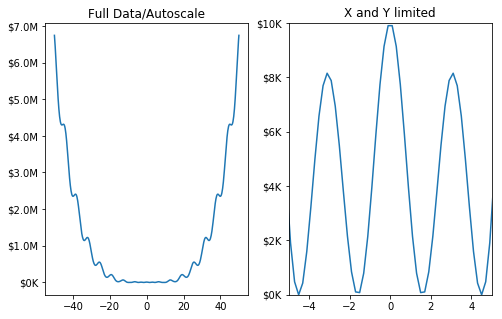

In [5]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib.ticker import FuncFormatter

def Num_Format(x, pos):
    """The two arguments are the number and tick position"""
    if x >= 1e6:
        string = '${:1.1f}M'.format(x*1e-6)
    else:
        string = '${:1.0f}K'.format(x*1e-3)
    return string

formatter = FuncFormatter(Num_Format)

x = np.linspace(-50,50,500)
y = x**2 + np.cos(x)*100

fig, axs = plt.subplots(1,2, figsize=(8,5))
axs[0].yaxis.set_major_formatter(formatter)
axs[0].plot(x, y**2)
axs[0].set_title('Full Data/Autoscale')

axs[1].plot(x, y**2)
axs[1].set_xlim(-5,5)
axs[1].set_ylim(0,10000)
axs[1].set_title('X and Y limited')
axs[1].yaxis.set_major_formatter(formatter)

plt.show()

### Ticks and Ticklabels customisation

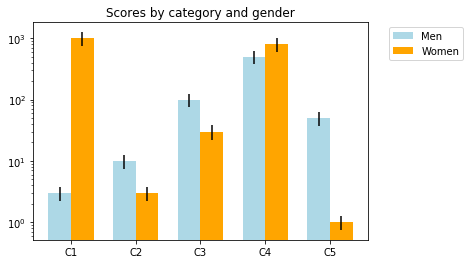

In [6]:
import numpy as np
import matplotlib.pyplot as plt

menMue = [3, 10, 100, 500, 50]
menSigma = [0.75, 2.5, 25, 125, 12.5]

fig, ax = plt.subplots()
ind = np.arange(len(menMue))      # the x locations for the groups
width = 0.35                      # the width of the bars
p1 = ax.bar(ind, menMue, width, color='lightblue', bottom=0, yerr=menSigma)

womenMue = [1000, 3, 30, 800, 1]
womenSigma = [250, 0.75, 8, 200, 0.25]
p2 = ax.bar(ind + width, womenMue, width, color='orange', bottom=0, yerr=womenSigma)

ax.set_title('Scores by category and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('C1', 'C2', 'C3', 'C4', 'C5'))
ax.set_yscale('log')
ax.legend((p1[1], p2[1]), ('Men', 'Women'), bbox_to_anchor=(1.3,1))

plt.show()

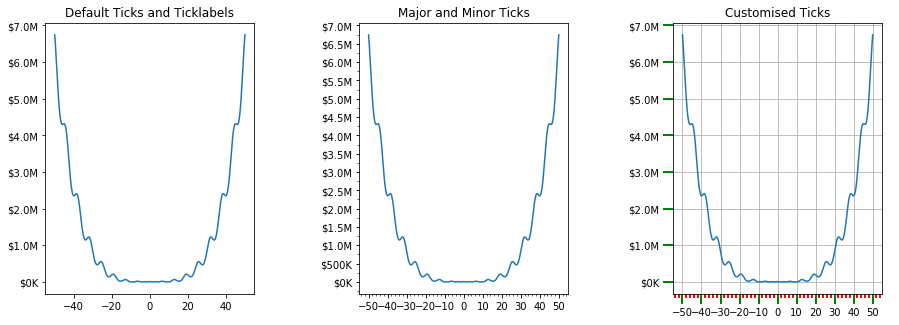

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.ticker import FuncFormatter

def Num_Format(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        string = '${:1.1f}M'.format(x*1e-6)
    else:
        string = '${:1.0f}K'.format(x*1e-3)
    return string

def plot_graph(axes, axis, major_step_size, minor_step_size):
    majorLocator = MultipleLocator(major_step_size)
    minorLocator = MultipleLocator(minor_step_size)
    if axis == 'x':
        axes.xaxis.set_major_locator(majorLocator)
        axes.xaxis.set_minor_locator(minorLocator)
    else:
        axes.yaxis.set_major_locator(majorLocator)
        axes.yaxis.set_minor_locator(minorLocator)
    axes.yaxis.set_major_formatter(formatter)

formatter = FuncFormatter(Num_Format)

x = np.linspace(-50,50,500)
y = x**2 + np.cos(x)*100

fig, axs = plt.subplots(1,3, figsize=(15,5))
fig.subplots_adjust(wspace=0.5)

axs[0].plot(x, y**2)
axs[0].set_title('Default Ticks and Ticklabels')
axs[0].yaxis.set_major_formatter(formatter)

axs[1].plot(x, y**2)
plot_graph(axs[1], 'y', 500000, 250000)
plot_graph(axs[1], 'x', 10, 2)
axs[1].set_title('Major and Minor Ticks')

axs[2].plot(x, y**2)
plot_graph(axs[2], 'x', 10, 2)

minorLocator = AutoMinorLocator()
axs[2].xaxis.set_minor_locator(minorLocator)
axs[2].tick_params(which='major', length=10, color='g')
axs[2].tick_params(which='minor', length=4, color='r')
axs[2].tick_params(which='both', width=2)
axs[2].set_title('Customised Ticks')
axs[2].grid(True)

plt.show()


### Customising Spines

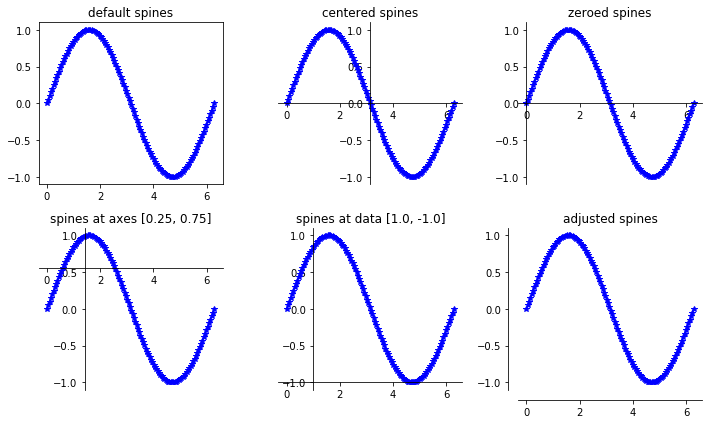

In [26]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 128)
y = np.sin(theta)

fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(2, 3, 1)
ax1.plot(theta, np.sin(theta), 'b-*')
ax1.set_title('default spines')

def plot_graph(axs, title, lposition, bposition):
    ax = fig.add_subplot(axs)
    ax.plot(theta, y, 'b-*')
    ax.set_title(title)
    ax.spines['left'].set_position(lposition)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position(bposition)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

plot_graph(232, 'centered spines', 'center', 'center') 
plot_graph(233, 'zeroed spines', 'zero', 'zero')
plot_graph(234, 'spines at axes [0.25, 0.75]', ('axes', 0.25), ('axes', 0.75))
plot_graph(235, 'spines at data [1.0, -1.0]', ('data', 1.0), ('data', -1.0))
plot_graph(236, 'adjusted spines', ('outward', 10), ('outward', 10))

plt.tight_layout()

plt.show()

### Hatch Demo

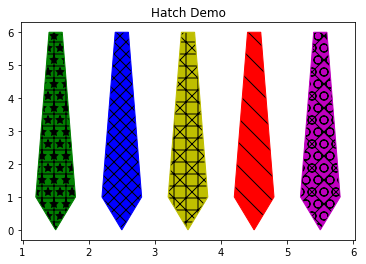

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0.2, 0.4, 0.6, 0.8, 0.5])
y = [1, 6, 6, 1, 0]

plt.fill(x+1, y, color='g', hatch='+*')
plt.fill(x+2, y, color='b', hatch='xx')
plt.fill(x+3, y, color='y', hatch='+x')
plt.fill(x+4, y, color='r', hatch='\\')
plt.fill(x+5, y, color='m', hatch='Ox')
plt.title('Hatch Demo')

plt.show()

### Annotation Demo

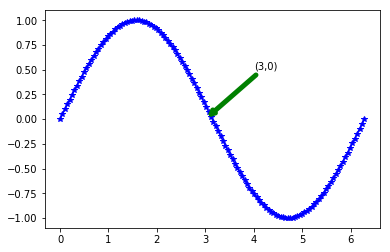

In [14]:
import matplotlib.pyplot as plt
theta = np.linspace(0, 2*np.pi, 128)
y = np.sin(theta)

plt.plot(theta, np.sin(theta), 'b-*')
plt.annotate("(3,0)",
                xy=(3, 0), xycoords='data',
                xytext=(4.0, 0.5), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="green", lw=5,  connectionstyle=("arc3,rad=0.")))
plt.show()

### Style Sheets

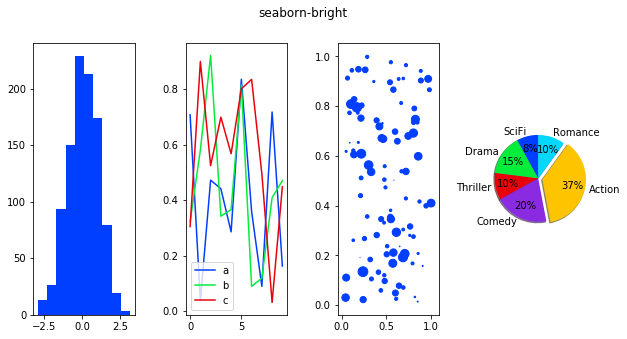

In [20]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1968)

plt.style.use('seaborn-bright')
fig, ax = plt.subplots(1, 4, figsize=(10,5))
fig.subplots_adjust(wspace=0.5)

ax[0].hist(np.random.randn(1000))
for i in range(3):
    ax[1].plot(np.random.rand(10))
ax[1].legend(['a', 'b', 'c'], loc='lower left')
ax[2].scatter(np.random.rand(100),np.random.rand(100), s=100*np.random.rand(100)*np.random.rand(100))

labels = ['SciFi', 'Drama', 'Thriller', 'Comedy', 'Action', 'Romance']
sizes = [8, 15, 10, 20, 37, 10]   # Add upto 100%
explode = (0, 0, 0.0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

ax[3].pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', pctdistance=0.7,
        shadow=True, startangle=90)
ax[3].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('seaborn-bright')

plt.show()

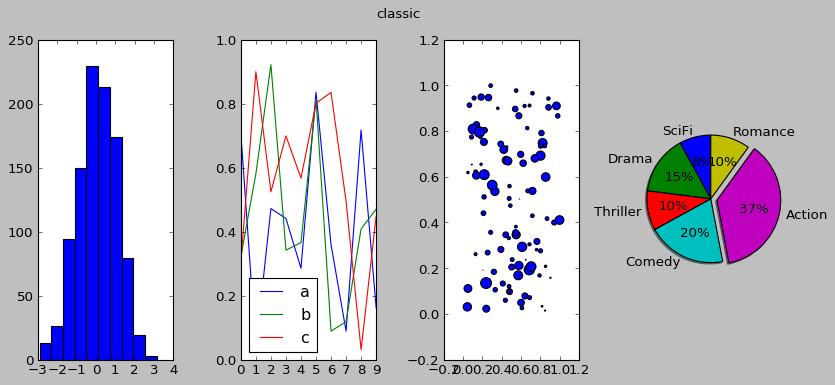

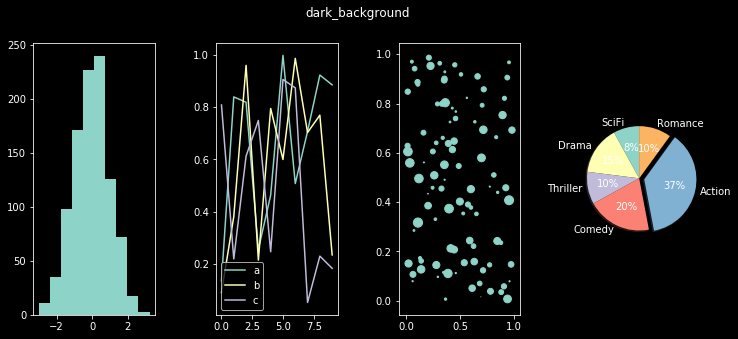

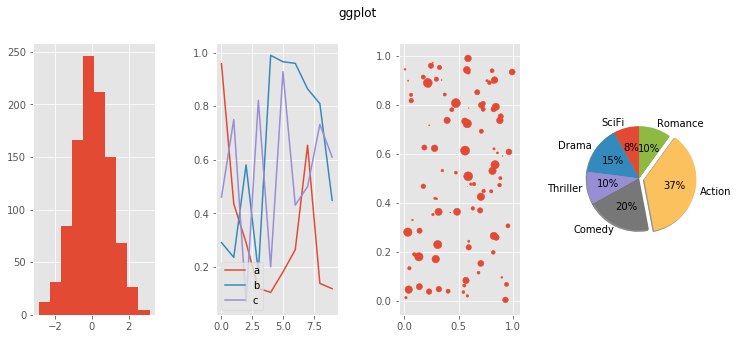

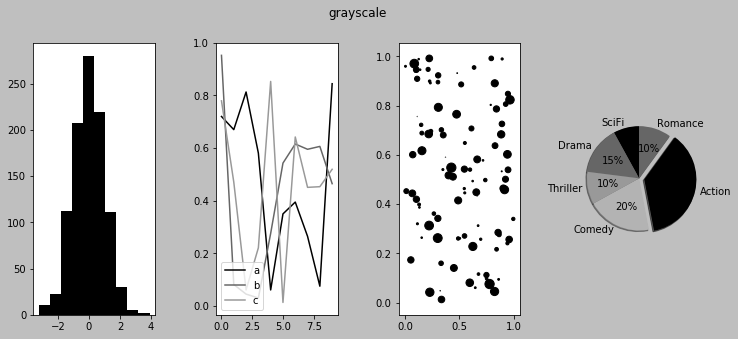

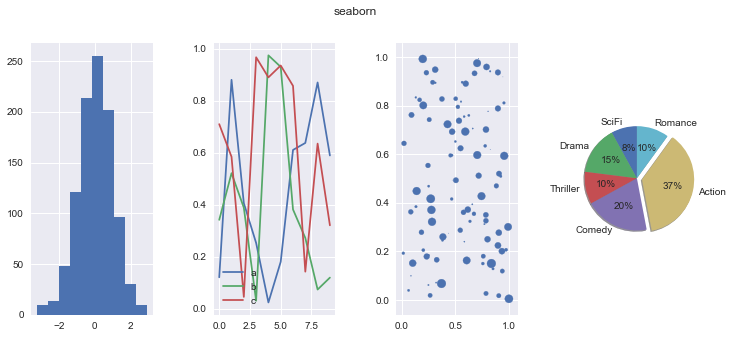

In [23]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1968)

style_list = ['classic', 'dark_background', 'ggplot', 'grayscale', 'seaborn']

def plot_the_graph(style):
    fig, ax = plt.subplots(1, 4, figsize=(12,5))
    fig.subplots_adjust(wspace=0.5)
    ax[0].hist(np.random.randn(1000))
    
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')
    
    ax[2].scatter(np.random.rand(100),np.random.rand(100), s=100*np.random.rand(100)*np.random.rand(100))
    
    labels = ['SciFi', 'Drama', 'Thriller', 'Comedy', 'Action', 'Romance']
    sizes = [8, 15, 10, 20, 37, 10]   # Add upto 100%
    explode = (0, 0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    ax[3].pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
    ax[3].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.suptitle(style)
    plt.show()
    
for style in style_list:
    with plt.style.context(style):
        plot_the_graph(style)
